# Analyzing a set of observations in a loop

When a star has multiple observations, it is useful to make a loop over all of the spectra files rather than running each one individually. To obtain LSD profiles and $B_z$ values, only one cleaned line mask is necessary since all the spectra files are from the same star. With the cleaned mask and .s files, you can loop over the `run_lsdpy` function to calculate outputs for each input spectrum file.

In the below tutorial, we will walk through how to calculate data from multiple spectra files for the same star. It is recommended you first look through the [tutorial for analyzing one observation](OneObservationFlow_Tutorial.ipynb) for additional background on individual steps. We have provided three spectra files: [hd46328_test_1.s](https://github.com/folsomcp/specpolFlow/blob/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_1.s), [hd46328_test_2.s](https://github.com/folsomcp/specpolFlow/blob/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_2.s), and [hd46328_test_3.s](https://github.com/folsomcp/specpolFlow/blob/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_3.s) for $\xi^1$ CMa (HD 46328; [Erba et al. 2021](https://doi.org/10.1093/mnras/stab1454)) and the line list ([LongList_T27000G35.dat](https://github.com/folsomcp/specpolFlow/blob/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/LongList_T27000G35.dat)) from the Vienna Atomic Line Database (VALD; [Ryabchikova et al. 2015](https://ui.adsabs.harvard.edu/abs/2015PhyS...90e4005R/abstract)).

First import `specpolFlow` and any other packages

In [6]:
import specpolFlow as pol

import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

## 1. Normalize the spectra

Before running LSD, the observed spectra need to be reasonably well normalized.  In some cases an automatic pipeline normalization might be sufficient.  For a more careful manual normalization, we can use [normPlot](NormalizingOneSpectrum.md).  When there are multiple observations of the same star made with the same instrument, a good approach can be to carefully normalize one observation, then save the parameters from normPlot and reuse those for the rest of the observations.  

That approach is illustrated here, although the example spectra are already relatively well normalized (except around the edges of a few spectral orders).

To normalize the first observation, you can follow [the normPlot guide](NormalizingOneSpectrum.md).  Don't forget to click the "save params" button before exiting!

In [7]:
# to run normPlot from within Python
import normPlot
normPlot.normplot('OneObservationFlow_tutorialfiles/hd46328_test_1.s')

# or to run normPlot from the terminal use
# normplot OneObservationFlow_tutorialfiles/hd46328_test_1.s

reading OneObservationFlow_tutorialfiles/hd46328_test_1.s, 6 column spectrum, assuming ESPaDOnS format
found 40 spectral orders:
366.8697  375.0667
372.9160  381.3805
379.1596  387.9127
385.6177  394.6723
392.2995  401.6688
399.2118  408.9194
406.3755  416.4357
413.8043  424.2347
421.5048  432.3300
429.4953  440.7387
437.7990  449.4817
446.4224  458.5765
455.3976  468.0471
464.7369  477.9195
474.4702  488.2142
484.6231  498.9638
495.2100  510.1934
506.2707  521.9437
517.8453  534.2454
529.9522  547.1380
542.6379  560.6702
555.9456  574.8843
569.9233  589.8384
584.6194  605.5910
600.0880  622.2096
616.4064  639.7630
633.6202  658.3311
651.8360  678.0099
671.3457  698.7484
692.3307  720.5830
714.6694  743.8265
738.4974  768.6196
763.9686  795.1224
791.2592  823.5182
820.5711  854.0175
852.1380  886.8629
886.2301  922.3358
923.1633  960.7646
963.3082  1002.5348
1007.1033  1048.1014
did not find exclude.dat, using defaults
did not find poly-deg.dat, using defaults
did not find params.dat, 

If you clicked the "save params" button, the parameters from normalizing the first observation will be saved to the files `exclude.dat`, `poly-deg.dat`, and `params.dat`.  These can then be applied to all the other observations.  Here we run normPlot in a loop, and use `batchMode=True` to skip the graphical interface.


In [8]:
obsfile_list = ['OneObservationFlow_tutorialfiles/hd46328_test_1.s',
                'OneObservationFlow_tutorialfiles/hd46328_test_2.s',
                'OneObservationFlow_tutorialfiles/hd46328_test_3.s']
for file in obsfile_list:
    normPlot.normplot(file, excludeRegionName='exclude.dat', 
                      polynomialsName='poly-deg.dat', 
                      paramsName='params.dat', batchMode=True)

reading OneObservationFlow_tutorialfiles/hd46328_test_1.s, 6 column spectrum, assuming ESPaDOnS format
found 40 spectral orders:
366.8697  375.0667
372.9160  381.3805
379.1596  387.9127
385.6177  394.6723
392.2995  401.6688
399.2118  408.9194
406.3755  416.4357
413.8043  424.2347
421.5048  432.3300
429.4953  440.7387
437.7990  449.4817
446.4224  458.5765
455.3976  468.0471
464.7369  477.9195
474.4702  488.2142
484.6231  498.9638
495.2100  510.1934
506.2707  521.9437
517.8453  534.2454
529.9522  547.1380
542.6379  560.6702
555.9456  574.8843
569.9233  589.8384
584.6194  605.5910
600.0880  622.2096
616.4064  639.7630
633.6202  658.3311
651.8360  678.0099
671.3457  698.7484
692.3307  720.5830
714.6694  743.8265
738.4974  768.6196
763.9686  795.1224
791.2592  823.5182
820.5711  854.0175
852.1380  886.8629
886.2301  922.3358
923.1633  960.7646
963.3082  1002.5348
1007.1033  1048.1014
did not find exclude.dat, using defaults
did not find poly-deg.dat, using defaults
did not find params.dat, 

This generates a set of files (`OneObservationFlow_tutorialfiles/hd46328_test_1.s.norm`, `OneObservationFlow_tutorialfiles/hd46328_test_2.s.norm`, `OneObservationFlow_tutorialfiles/hd46328_test_3.s.norm`). These should have a consistent normalization, and can be used for the rest of the tutorial.  However, to keep this step optional, and since the initial files were adequately normalized, we use the originals to calculate LSD profiles below.

## 2. Create & clean the LSD line mask

Since all our observations are of the same star, we can create one mask that can be used for all the observations of the star.  We specify the name of the VALD line list and the name and location of our created mask. Next, we remove regions within 300 km s$^{-1}$ (specific to this example) of the Balmer series and Balmer jump. 

In [9]:
# making the mask file from the VALD line list
lineList_filename = 'OneObservationFlow_tutorialfiles/LongList_T27000G35.dat'
full_mask_filename = 'OneObservationFlow_tutorialfiles/test_output/T27000G35_depth0.02.mask'
mask = pol.make_mask(lineList_filename, outMaskName=full_mask_filename, depthCutoff = 0.02, atomsOnly = True)

# using default regions for cleaning
velrange = 300.0
ExcludeRegions = pol.get_Balmer_regions_default(velrange) + pol.get_telluric_regions_default()

# cleaning and saving the mask
clean_mask_filename = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_depth0.02_clean.mask'
mask.clean(ExcludeRegions).save(clean_mask_filename)

# optionally, you can interactively clean lines from the line mask with
# pol.cleanMaskUI(full_mask_filename, observation_filename, clean_mask_filename)

missing Lande factors for 160 lines (skipped) from:
['He 2', 'O 2']
skipped all lines for species:
['H 1']


To fine-tune the mask, it can be helpful to use the interactive mask cleaning tool.  See the [full tutorial](../Tutorials/3b-MaskUI_Tutorial.md) for more information. 

## 3. Create LSD profile

We then create the LSD profiles for all three observed spectra files, by looping over the file names of the observations and running LSDpy.

In [10]:
obsfile_list = ['OneObservationFlow_tutorialfiles/hd46328_test_1.s',
                'OneObservationFlow_tutorialfiles/hd46328_test_2.s',
                'OneObservationFlow_tutorialfiles/hd46328_test_3.s']

for obsfile in obsfile_list:
    # Generate a name for the LSD profile, in a different folder.  
    # This could also just be pulled from a list of output file names.
    lsdfile = obsfile.replace('tutorialfiles/','tutorialfiles/test_output/').replace('.s', '.lsd')
    lsd, mod = pol.run_lsdpy(obs = obsfile, 
            mask = clean_mask_filename, outLSDName = lsdfile, 
            velStart = - 100.0, velEnd = 100.0, velPixel = 2.6, 
            normDepth = 0.2, normLande = 1.2, normWave = 500.0,
            plotLSD=False)

Modified line mask, removed 75 too closely spaced lines
Average observed spec velocity spacing: 1.810029 km/s
using a 78 point profile with 2.600000 km/s pixels
mean mask depth 0.102471 wl 494.041 Lande 1.180924 (from 1028 lines)
mean mask norm weightI 0.512354 weightV 0.485692
saving model spectrum to  ...
I reduced chi2 263.1932 (chi2 20377468.87 constraints 77502 dof 78)
 Rescaling error bars by: 16.223230
V reduced chi2 1.1246 (chi2 87074.15 constraints 77502 dof 78)
 Rescaling error bars by: 1.060491
 removing profile continuum pol: -8.3777e-06 +/- 8.4331e-09 (avg err 9.1553e-05)
N1 reduced chi2 1.1030 (chi2 85396.51 constraints 77502 dof 78)
 Rescaling error bars by: 1.050225
 removing profile continuum pol: -9.2523e-07 +/- 8.2706e-09 (avg err 9.0667e-05)
(possible Stokes I uncertainty underestimate 1.9564e-03 vs 1.4637e-03)
line range estimate -14.200000000000188 42.99999999999969 km/s
V in line reduced chi^2 92.046659 (chi2 2025.026499) 
 detect prob 1.000000 (fap 0.000000e+00)

We can also generate all the file names inside a loop using a template string:

In [11]:
# create a template for the filenames
obsfile = 'OneObservationFlow_tutorialfiles/hd46328_test_{}.s'
lsdfile = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'

for i in range(3):
    # here we generate file names from a template
    lsd, mod = pol.run_lsdpy(obs = obsfile.format(i+1), 
            mask = clean_mask_filename, outLSDName = lsdfile.format(i+1), 
            velStart = - 100.0, velEnd = 100.0, velPixel = 2.6, 
            normDepth = 0.2, normLande = 1.2, normWave = 500.0,
            plotLSD=False)

Modified line mask, removed 75 too closely spaced lines
Average observed spec velocity spacing: 1.810029 km/s
using a 78 point profile with 2.600000 km/s pixels
mean mask depth 0.102471 wl 494.041 Lande 1.180924 (from 1028 lines)
mean mask norm weightI 0.512354 weightV 0.485692
saving model spectrum to  ...
I reduced chi2 263.1932 (chi2 20377468.87 constraints 77502 dof 78)
 Rescaling error bars by: 16.223230
V reduced chi2 1.1246 (chi2 87074.15 constraints 77502 dof 78)
 Rescaling error bars by: 1.060491
 removing profile continuum pol: -8.3777e-06 +/- 8.4331e-09 (avg err 9.1553e-05)
N1 reduced chi2 1.1030 (chi2 85396.51 constraints 77502 dof 78)
 Rescaling error bars by: 1.050225
 removing profile continuum pol: -9.2523e-07 +/- 8.2706e-09 (avg err 9.0667e-05)
(possible Stokes I uncertainty underestimate 1.9564e-03 vs 1.4637e-03)
line range estimate -14.200000000000188 42.99999999999969 km/s
V in line reduced chi^2 92.046659 (chi2 2025.026499) 
 detect prob 1.000000 (fap 0.000000e+00)

We can also output a .pdf with plots of the LSD profiles for each observation, which is useful for ensuring that the LSD profiles look as expected. 

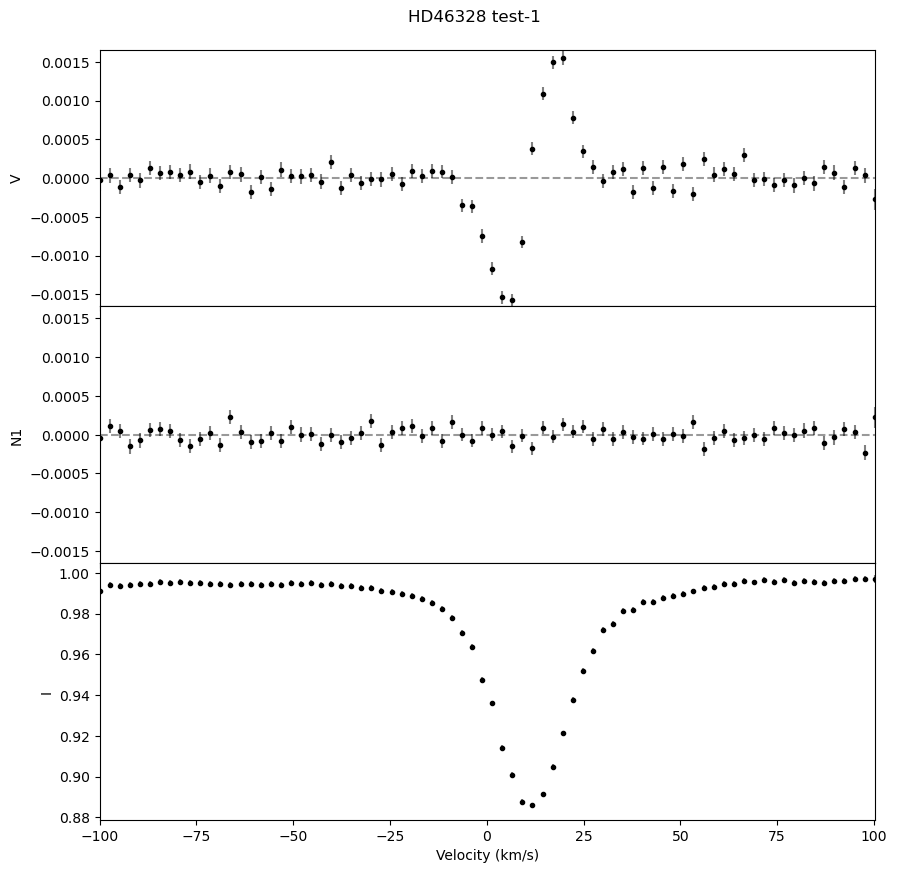

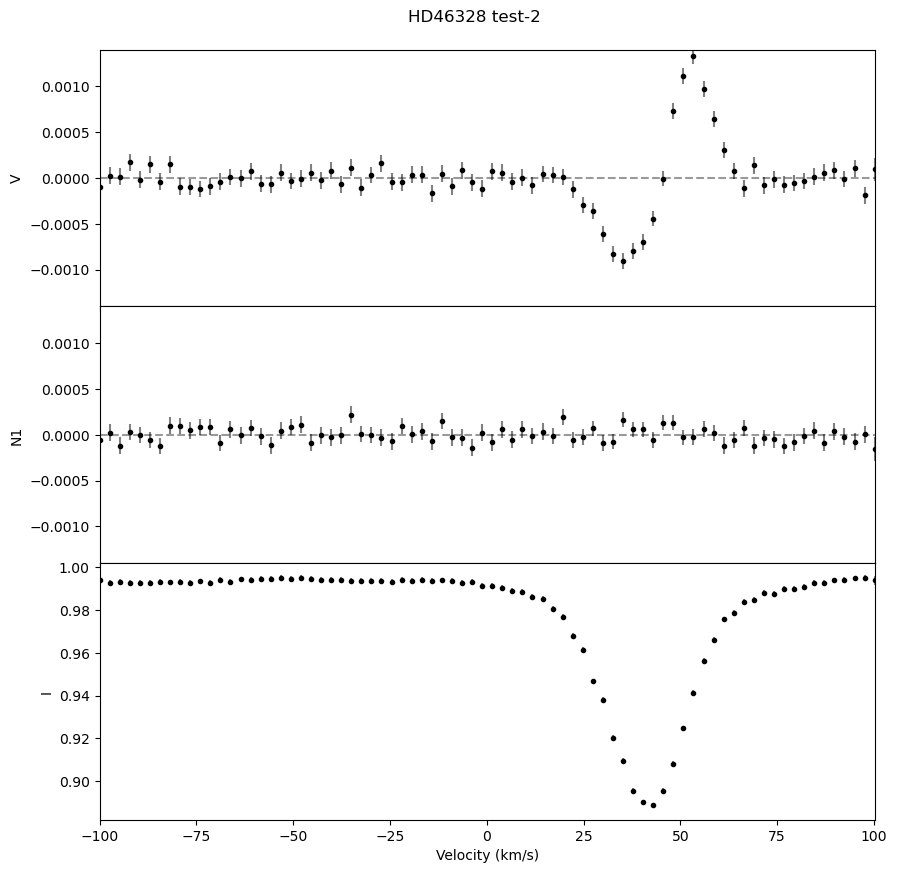

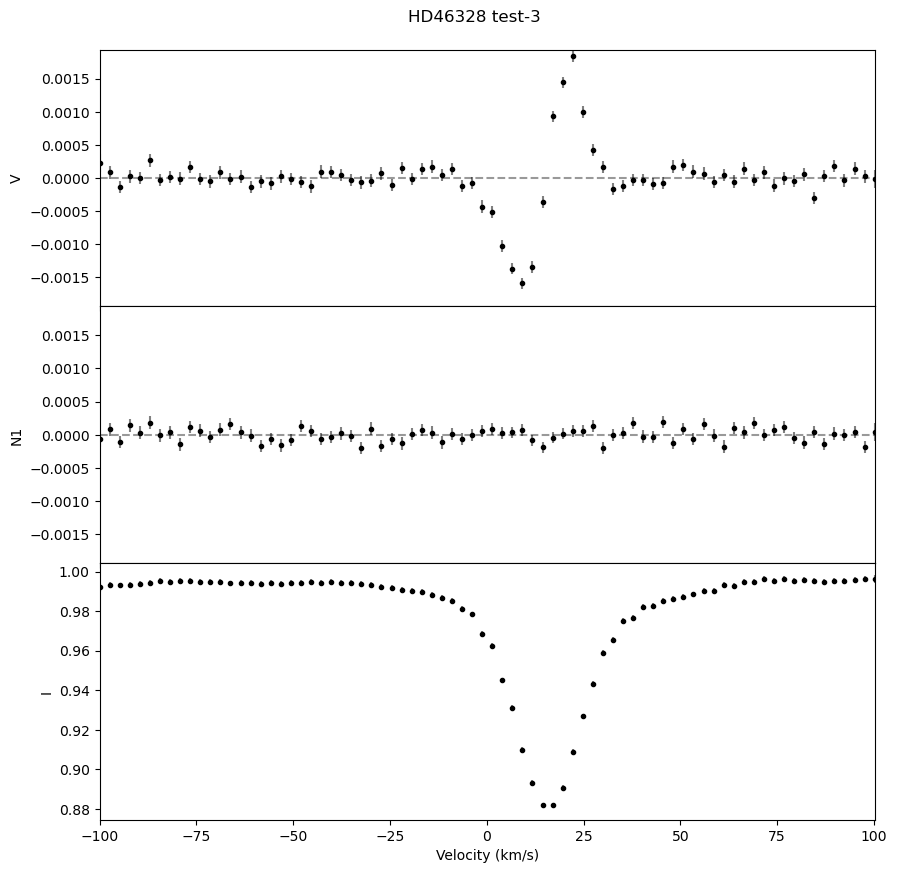

In [12]:
# open an output .pdf file
with PdfPages('OneObservationFlow_tutorialfiles/test_output/hd46328_test.pdf') as pdf:
    lsdfile = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'
    # loop over the LSD profiles, reading them in and plotting them
    for i in range(3):
        lsd = pol.read_lsd(lsdfile.format(i+1))
        fig, ax = lsd.plot()

        fig.suptitle('HD46328 test' + '-'+ str(i+1), y = 0.92)
        pdf.savefig(fig)

## 4. Bz calculation

We can then loop over the LSD profiles to calculate Bz for each of them. In this example, each observation has a different radial velocity.  This means the integration range used in the Bz calculation needs to be different for each observation. (For a normal sincle star this is not necessary). One method to resolve this is to make a list of `vrad` values, and use those inside the loop. 

In [13]:
# create a template for the LSD profile filenames
lsdpath = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'

# set the radial velocity for each observation
vrad = [12.0, 42.0, 16.0]

# save the results into a list, appending to the list
Bz_list = []
for i in range(3):
    velrange = [vrad[i] - 30.0, vrad[i] + 30.0]

    # read the LSD profile
    lsd = pol.read_lsd(lsdpath.format(i+1))
    
    # calculate Bz, using the velocity range set for this observation
    Bz = lsd.calc_bz(cog = 'I', velrange = velrange, bzwidth = 20.0, plot = False)
    Bz_list.append(Bz)

# print some results
for Bz in Bz_list:
    print('V bz (G)', Bz['V bz (G)'], ' V bz sig (G)', Bz['V bz sig (G)'], ' V FAP', Bz['V FAP'])

using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line
V bz (G) -113.65424816561506  V bz sig (G) 4.148373089850505  V FAP 0.0
V bz (G) -112.49569214929704  V bz sig (G) 4.409081202807453  V FAP 0.0
V bz (G) -104.44383156707192  V bz sig (G) 4.2734725037558965  V FAP 0.0


Often, we want to output a single table with the Bz results for all observations. This can be done conveniently with pandas. A reasonably efficient approach is to collect the results for each observation into a list, then make a dataframe from that list.  Alternatively, one could incrementally add to a dataframe on each iteration of the loop (e.g. `table = pd.concat(table, newline)`), although this generates new dataframes on each iteration, which is inefficent for large datasets.

In [14]:
Bz_table = pd.DataFrame(Bz_list)

star = ['hd46328_1', 'hd46328_2', 'hd46328_3']
Bz_table.insert(0, "Star", star)

Bz_table

,Star,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,hd46328_1,0.994433,11.836342,-8.163658,31.836342,-113.654248,4.148373,0.0,-3.967533,4.065204,0.281862,0.0,0.0,0.0
1,hd46328_2,0.993514,41.379051,21.379051,61.379051,-112.495692,4.409081,0.0,-1.465655,4.350233,0.411965,0.0,0.0,0.0
2,hd46328_3,0.994229,16.425263,-3.574737,36.425263,-104.443832,4.273473,0.0,3.006969,4.177154,0.249865,0.0,0.0,0.0


As before, we can also make a .pdf for all the Bz plots.  Here we repeat the previous steps and generate a .pdf with the Bz plots.

using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line
using AUTO method for the normalization
  using the median of the continuum outside of the line


,Star,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,hd46328_1,0.994433,11.836342,-8.163658,31.836342,-113.654248,4.148373,0.0,-3.967533,4.065204,0.281862,0.0,0.0,0.0
1,hd46328_2,0.993514,41.379051,21.379051,61.379051,-112.495692,4.409081,0.0,-1.465655,4.350233,0.411965,0.0,0.0,0.0
2,hd46328_3,0.994229,16.425263,-3.574737,36.425263,-104.443832,4.273473,0.0,3.006969,4.177154,0.249865,0.0,0.0,0.0


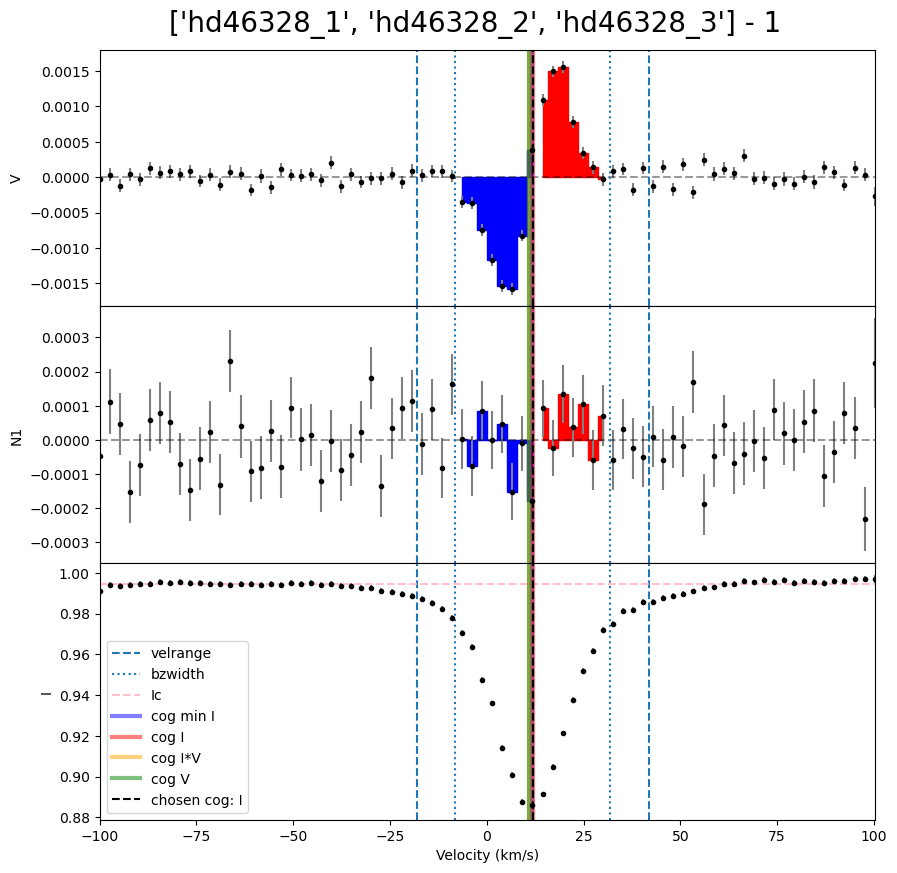

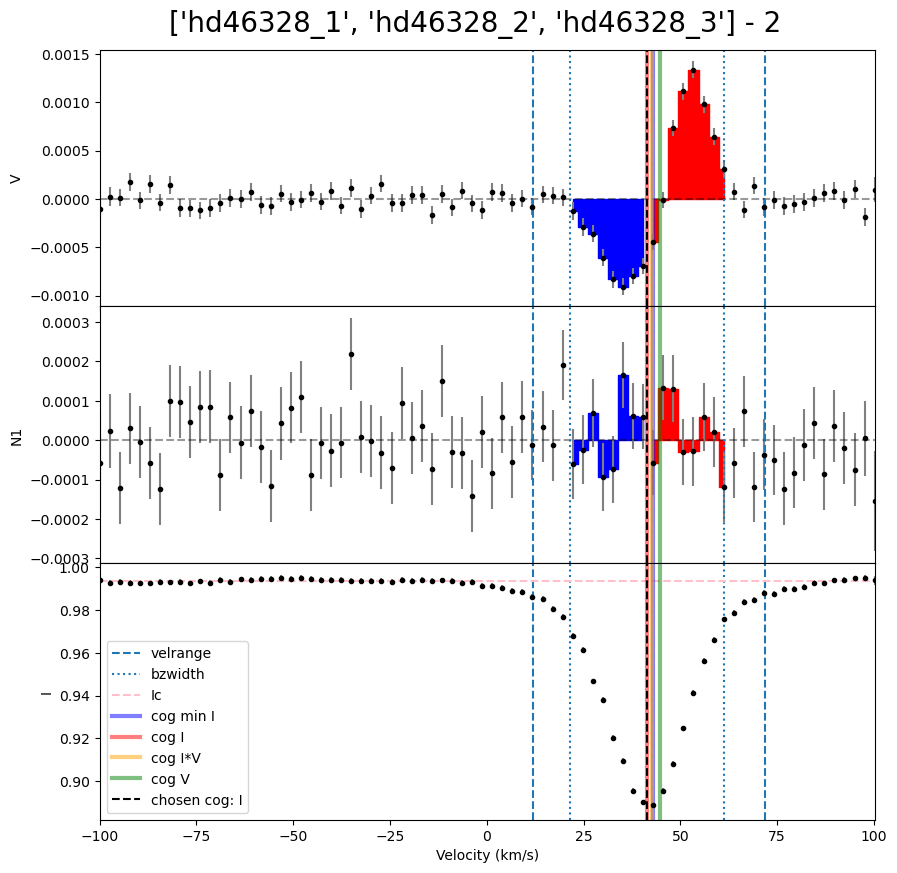

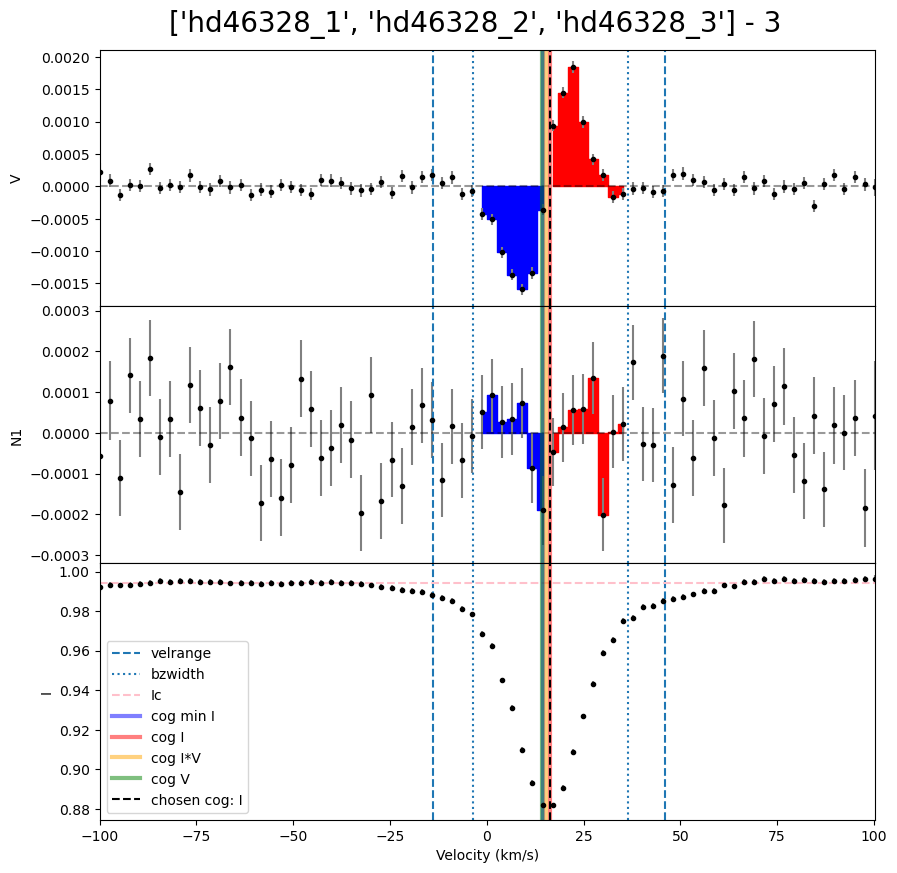

In [15]:
lsdpath = 'OneObservationFlow_tutorialfiles/test_output/hd46328_test_{}.lsd'
vrad = [12.0, 42.0, 16.0]
star = ['hd46328_1', 'hd46328_2', 'hd46328_3']

with PdfPages('OneObservationFlow_tutorialfiles/test_output/hd46328_test_Bz.pdf') as pdf:

    Bz_list = []
    for i in range(3):
        lsd = pol.read_lsd(lsdpath.format(i+1))

        velrange = [vrad[i] - 30.0, vrad[i] + 30.0]
        Bz, fig = lsd.calc_bz(cog = 'I', velrange = velrange, bzwidth = 20.0, plot = True)
        Bz_list.append(Bz)

        fig.suptitle('{} - {}'.format(star,i+1), fontsize = 20, y = 0.92)
        pdf.savefig(fig)

Bz_table = pd.DataFrame(Bz_list)
Bz_table.insert(0, "Star", star)
Bz_table